In [1]:
import numpy as np
from matplotlib import pyplot as plt
from optical_model_discrete import optical_model

In [2]:
#construct the optical model by passing it the matched quad settings (as a
#1d vector with 16 vals, 1 val for each LTU quad), the beam energy in MeV, and the gas detector reading at the match.

#the values in this cell are taken from an aggregation of 3 real scans performed during an MD on 2018-12-18 from 10:12am - 10:25am


gdet_max = 3.130072548518238 #the highest seen gas detector reading

#the LTU quad settings that produced the highest gdet reading (above). We assume the beam was matched at these settings.
matched_quad_settings = np.array([-80.14843195,  73.91221362, -86.55598278,   0.1345117 , 
                                   57.26686987,  21.0890534 , -21.06755655,  21.10042229,
                                  -21.1006412 ,  21.07691109, -21.05064652,  50.2967137 ,
                                  -60.7843127 ,  17.9053793 ,  50.7211199 , -15.        ])


beamEnergyMeV = 14535.0 #beam energy in MeV

#construct model
model = optical_model(matched_quad_settings, beamEnergyMeV, gdet_max)


In [3]:
#collect settings for a 1d scan of the first LTU quad (QUAD:LTU1:620) (index 0)
quad_id = 0
scan = np.array([np.copy(model.matched_quad_settings) for i in range(1000)])
xs = np.linspace(.8, 1.2, 1000)*model.matched_quad_settings[quad_id]
scan[:,quad_id] = xs

beamsizes = [] #container for beamsize results
gdets = [] #container for gas detector results

#evaluate beamsize and simulated gdet (gas detector) for each setting in the scan
for setting in scan:
    model.update_settings(setting) #update model to new quad settings
    gdet, beamsize =  model.gas_detector()
    beamsizes += [beamsize] #evaluate beamsize at current settings
    gdets += [gdet] #evaluate "gdet" at current settings

Text(0.5, 1.0, '<Beamsize> vs. QUAD:LTU1:620')

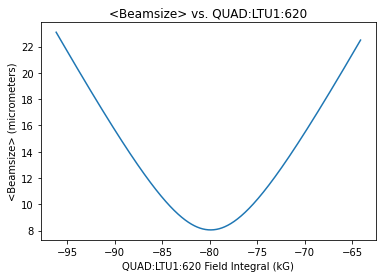

In [4]:
#plot the modeled beamsizes vs the quad values (1d scan)
plt.plot(xs, beamsizes)
plt.xlabel('QUAD:LTU1:620 Field Integral (kG)')
plt.ylabel('<Beamsize> (micrometers)')
plt.title('<Beamsize> vs. QUAD:LTU1:620')

Text(0.5, 1.0, 'GDET (Simulated) vs. QUAD:LTU1:620')

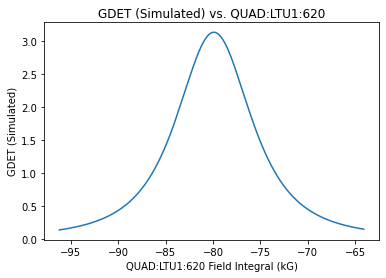

In [5]:
#plot the "simulated" gas detector readings vs the quad values (1d scan)
plt.plot(xs, gdets)
plt.xlabel('QUAD:LTU1:620 Field Integral (kG)')
plt.ylabel('GDET (Simulated)')
plt.title('GDET (Simulated) vs. QUAD:LTU1:620')

In [11]:
#perform a 2d raster scan by varying the quads at index 0 and 1 (QUAD:LTU1:620 and QUAD:LTU1:640)

quadx_id = 0 #QUAD:LTU1:620
quady_id = 1 #QUAD:LTU1:640
num_points = 99 #heatmap will be num_points x num_points
scan_range = 5 #quad values in scan will range from matched_quad_setting +/- scan_range

xs = np.linspace(-scan_range, scan_range, num_points) + model.matched_quad_settings[quadx_id]
ys = np.linspace(-scan_range, scan_range, num_points) + model.matched_quad_settings[quady_id]

beamsizes = np.zeros((num_points,num_points)) #container for beamsize results
gdets = np.zeros((num_points,num_points)) #container for gas detector results

#evaluate beamsize and simulated gdet (gas detector) for each setting in the scan
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        setting = np.copy(model.matched_quad_settings)
        setting[quadx_id] = x
        setting[quady_id] = y
        model.update_settings(setting)
        gdet, beamsize =  model.gas_detector()
        gdets[-(j+1),i] = gdet
        beamsizes[-(j+1),i] =  beamsize



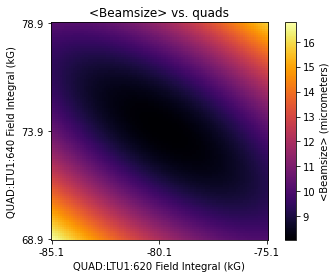

In [12]:
#plot a heatmap of the results of the 2d raster scan of beamsize

plt.imshow(beamsizes, cmap = 'inferno', interpolation='none')


step_x = int(num_points / 2)
x_positions = np.arange(0,num_points,step_x) 
x_labels = np.round(xs[::step_x],1) 
plt.xticks(x_positions, x_labels)
plt.xlabel('QUAD:LTU1:620 Field Integral (kG)')

step_y = int(num_points / 2)
y_positions = np.arange(0,num_points,step_y)[::-1]
y_labels = np.round(ys[::step_y],1)
plt.yticks(y_positions, y_labels)
plt.ylabel('QUAD:LTU1:640 Field Integral (kG)')

cbar = plt.colorbar()
cbar.set_label('<Beamsize> (micrometers)')
plt.title('<Beamsize> vs. quads')
plt.show()

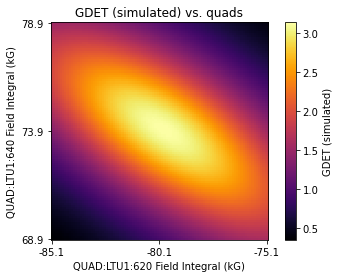

In [13]:
#plot a heatmap of the results of the 2d raster scan of simulated Gas Detector

plt.imshow(gdets, cmap = 'inferno', interpolation='none')


step_x = int(num_points / 2)
x_positions = np.arange(0,num_points,step_x) 
x_labels = np.round(xs[::step_x],1) 
plt.xticks(x_positions, x_labels)
plt.xlabel('QUAD:LTU1:620 Field Integral (kG)')

step_y = int(num_points / 2)
y_positions = np.arange(0,num_points,step_y)[::-1]
y_labels = np.round(ys[::step_y],1)
plt.yticks(y_positions, y_labels)
plt.ylabel('QUAD:LTU1:640 Field Integral (kG)')

cbar = plt.colorbar()
cbar.set_label('GDET (simulated)')
plt.title('GDET (simulated) vs. quads')
plt.show()

In [9]:
#perform a 2d raster scan of the gas detector WITH NOISE vs. quads at index 0 and 1 (QUAD:LTU1:620 and QUAD:LTU1:640)



quadx_id = 0 #QUAD:LTU1:620
quady_id = 1 #QUAD:LTU1:640
num_points = 9 #heatmap will be num_points x num_points
scan_range = 3 #quad values in scan will range from matched_quad_setting +/- scan_range

xs = np.linspace(-scan_range, scan_range, num_points) + model.matched_quad_settings[quadx_id]
ys = np.linspace(-scan_range, scan_range, num_points) + model.matched_quad_settings[quady_id]

gdets = np.zeros((num_points,num_points)) #container for gas detector results

#evaluate beamsize and simulated gdet (gas detector) for each setting in the scan
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        setting = np.copy(model.matched_quad_settings)
        setting[quadx_id] = x
        setting[quady_id] = y
        model.update_settings(setting)
        
        #calculate gas detector plus gaussian noise from signal and from background.
        #uses default arguments: snr = signal-to-noise ratio, bg_std_dev = std dev of background noise
        gdet =  model.gas_detector_with_noise(snr = 0.05, bg_std_dev = 0.1)
        
        
        gdets[-(j+1),i] = gdet #fill 2d heatmap array



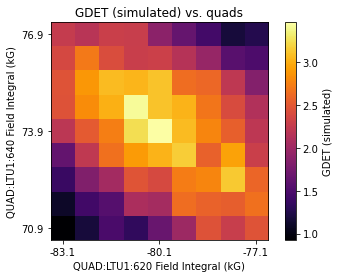

In [10]:
#plot a heatmap of the results of the 2d raster scan of simulated Gas Detector

plt.imshow(gdets, cmap = 'inferno', interpolation='none')


step_x = int(num_points / 2)
x_positions = np.arange(0,num_points,step_x) 
x_labels = np.round(xs[::step_x],1) 
plt.xticks(x_positions, x_labels)
plt.xlabel('QUAD:LTU1:620 Field Integral (kG)')

step_y = int(num_points / 2)
y_positions = np.arange(0,num_points,step_y)[::-1]
y_labels = np.round(ys[::step_y],1)
plt.yticks(y_positions, y_labels)
plt.ylabel('QUAD:LTU1:640 Field Integral (kG)')

cbar = plt.colorbar()
cbar.set_label('GDET (simulated)')
plt.title('GDET (simulated) vs. quads')
plt.show()